Name : N.D. Liyanage

Index Number : 190356E

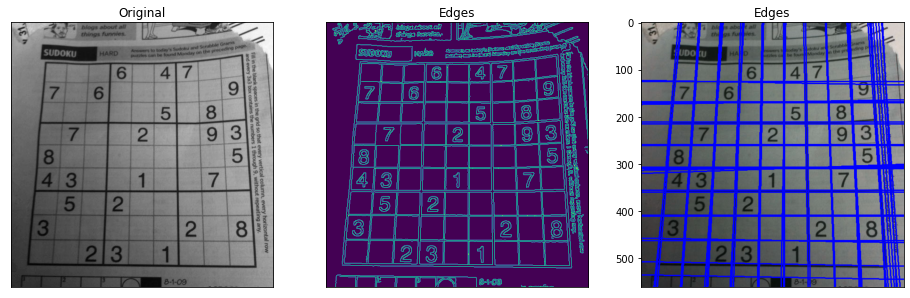

In [1]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sudoku = cv.imread("./images/sudoku.png",cv.IMREAD_COLOR)
assert sudoku is not None

sudoku_gray = cv.cvtColor(sudoku,cv.COLOR_BGR2GRAY)
edges = cv.Canny(sudoku_gray,20,120,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0 + 1000*(-b)), int(y0 + 1000*a)
    x2,y2 = int(x0 - 1000*(-b)), int(y0 - 1000*a)
    cv.line(sudoku,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax =  plt.subplots(1,3,figsize=(16,8))

ax[0].imshow(sudoku_gray,cmap='gray')
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(edges)
ax[1].set_title("Edges")
ax[1].set_xticks([]),ax[0].set_yticks([])

ax[2].imshow(sudoku)
ax[2].set_title("Edges")
ax[2].set_xticks([]),ax[1].set_yticks([])
plt.show()


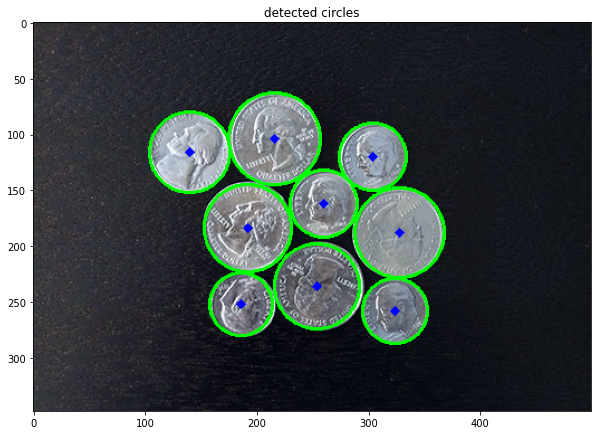

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'images/coins.jpg',cv.IMREAD_COLOR)
assert img is not None

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=190,param2=70,minRadius=15,maxRadius=70)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(img)
ax.set_title("detected circles")
plt.show()

x = 29.0, y= 109.0, scale = 1.0,orientation = 0.0,p1=(4, 76),p2=(54, 141)


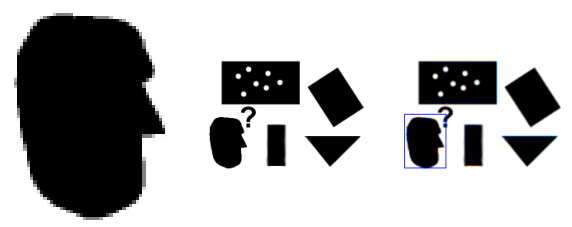

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv.imread(r'images/pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
temp = cv.imread(r'images/templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp is not None

im_edges=cv.Canny(img,50,250)
temp_edges=cv.Canny(temp,50,250)
alg=cv.createGeneralizedHoughGuil()
alg.setTemplate(temp_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions,votes=alg.detect(im_edges)

out=cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight=temp.shape[0]/2.0*scale
    halfWidth=temp.shape[1]/2.0*scale
    p1=(int(x-halfWidth),int(y-halfHeight))
    p2=(int(x+halfWidth),int(y+halfHeight))
    print('x = {}, y= {}, scale = {},orientation = {},p1={},p2={}'.format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))

fig, ax = plt.subplots(1,3, figsize =(10,10) )
ax[0].imshow(temp, cmap = 'gray')
ax[0].axis('off')
ax[1].imshow(img, cmap = 'gray')
ax[1].axis('off')
ax[2].imshow(out, cmap = 'gray')
ax[2].axis('off')
plt.show()


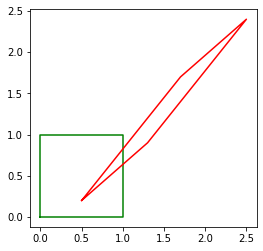

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s= 2
tx, ty = 0.5, 0.2
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0 ,1]])
Y = H @ X

a11,a12,a21,a22 = 0.8, 1.2, 0.7, 1.5
A = np.array([[a11,a12,tx], [a21,a22,ty],[0,0,1]])
Y = A @ X

x = np.append(X[0,:], X[0,0])
y = np.append(X[1,:], X[1,0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color = 'g')
ax.set_aspect('equal')

x = np.append(Y[0,:], Y[0,0])
y = np.append(Y[1,:], Y[1,0])
ax.plot(x, y, color = 'r')
ax.set_aspect('equal')
plt.show()

In [12]:
import numpy as np 
import cv2 as cv

im1 = cv.imread(r"images/img1.ppm", cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r"images/img4.ppm", cv.IMREAD_ANYCOLOR)

H = []
with open(r"C:\Users\Lahiru Sanjaya\Desktop\New folder\H1to4p") as f:
    H = np.array([[float(h) for h in line.split()]for line in f])

im1to4 = cv.warpPerspective(im4, np.linalg.inv(H), (2000, 1000))

im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im4 = cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4 = cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,3, figsize = (100,100))
ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(im4)
ax[1].axis('off')
ax[2].imshow(im1to4)
ax[2].axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lahiru Sanjaya\\Desktop\\New folder\\H1to4p'